In [2]:
import numpy as np
import matplotlib.pyplot as plt


class LinearModel:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = np.random.randn(num_features)
        self.bias = 0.0

    def call(self, X):
        return np.dot(X, self.weights) + self.bias


class LinearRegressor(LinearModel):
    def fit(self, X, y, learning_rate=0.01, epochs=100):
        error_history = []
        for _ in range(epochs):
            predictions = self.call(X)
            error = y - predictions
            gradient = -np.dot(X.T, error) / len(y)
            self.weights -= learning_rate * gradient
            self.bias -= learning_rate * np.mean(error)
            current_error = ((y - predictions) ** 2).sum()
            error_history.append(current_error)
        return error_history

    def predict(self, X):
        return self.call(X)


class LinearClassifier(LinearModel):
    def fit(self, X, y, learning_rate=0.01, epochs=100):
        error_history = []
        for _ in range(epochs):
            predictions = self.call(X)
            sigmoid = 1 / (1 + np.exp(-predictions))
            error = y - sigmoid
            gradient = -np.dot(X.T, error) / len(y)
            self.weights -= learning_rate * gradient
            self.bias -= learning_rate * np.mean(error)
            current_error = -np.mean(y * np.log(sigmoid) + (1 - y) * np.log(1 - sigmoid))
            error_history.append(current_error)
        return error_history

    def predict(self, X):
        predictions = self.call(X)
        sigmoid = 1 / (1 + np.exp(-predictions))
        return np.round(sigmoid)

    def predict_proba(self, X):
        predictions = self.call(X)
        sigmoid = 1 / (1 + np.exp(-predictions))
        return sigmoid


In [3]:
import pandas as pd

In [4]:
import pandas as pd

data = pd.read_csv('Student_Performance.csv')
print(data.head())

Y = data['Performance Index'] 
X = data.drop(columns=['Performance Index'])

X['Extracurricular Activities'] = X['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})
X = X.to_numpy()


   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


In [5]:
# Вычислите среднее по столбцам.
mean = np.mean(X, axis=0)

# Вычислите стандартное отклонение по столбцам.
std = np.std(X, axis=0)

# Нормализуйте данные по столбцам (стандартное масштабирование).
normalized_X = (X - mean) / std

# Нормализуйте и выходные данные
normalized_Y = (Y.to_numpy() - np.mean(Y.to_numpy())) / np.std(Y.to_numpy())

In [6]:
lr = LinearRegressor(num_features=X.shape[1])
history = lr.fit(normalized_X, normalized_Y, learning_rate=0.01, epochs=100)

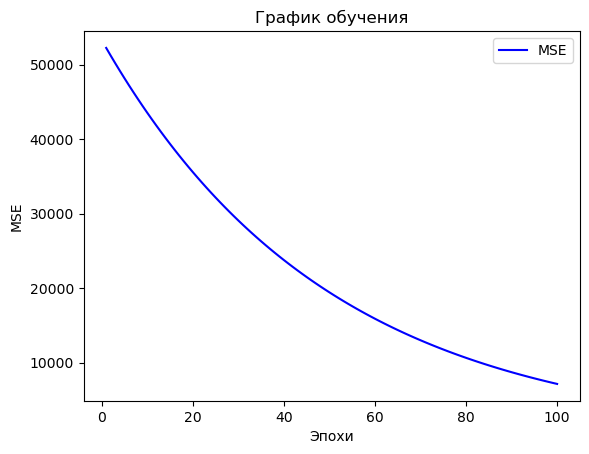

In [7]:
epochs = range(1, len(history) + 1)

# Постройте график обучения.
plt.plot(epochs, history, 'b', label='MSE')
plt.title('График обучения')
plt.xlabel('Эпохи')
plt.ylabel('MSE')
plt.legend()

# Отобразите график.
plt.show()

In [10]:
data = pd.read_csv('german.csv', sep=';')
print(data.head())
Y = data['Creditability'] 
X = data.drop('Creditability', axis=1)

   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

In [11]:
print(data.describe())

       Creditability  Account_Balance  Duration_of_Credit_monthly  \
count    1000.000000      1000.000000                 1000.000000   
mean        0.700000         2.577000                   20.903000   
std         0.458487         1.257638                   12.058814   
min         0.000000         1.000000                    4.000000   
25%         0.000000         1.000000                   12.000000   
50%         1.000000         2.000000                   18.000000   
75%         1.000000         4.000000                   24.000000   
max         1.000000         4.000000                   72.000000   

       Payment_Status_of_Previous_Credit      Purpose  Credit_Amount  \
count                         1000.00000  1000.000000     1000.00000   
mean                             2.54500     2.828000     3271.24800   
std                              1.08312     2.744439     2822.75176   
min                              0.00000     0.000000      250.00000   
25%               

In [12]:
# Вычислите среднее по столбцам.
mean = np.mean(X, axis=0)

# Вычислите стандартное отклонение по столбцам.
std = np.std(X, axis=0)

# Нормализуйте данные по столбцам (стандартное масштабирование).
normalized_X = (X - mean) / std

In [13]:
lc = LinearClassifier(num_features=X.shape[1])
history = lc.fit(normalized_X, Y.to_numpy(), learning_rate=0.01, epochs=40)

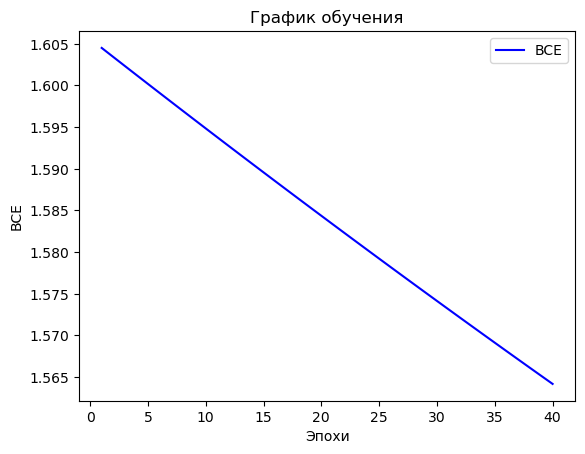

In [14]:
epochs = range(1, len(history) + 1)

# Постройте график обучения.
plt.plot(epochs, history, 'b', label='BCE')
plt.title('График обучения')
plt.xlabel('Эпохи')
plt.ylabel('BCE')
plt.legend()

# Отобразите график.
plt.show()

In [15]:
pred = lc.predict(normalized_X)
print('accuracy: ', (pred == Y).sum() / len(Y))

accuracy:  0.538


In [16]:
import sklearn.metrics as skm
print(f'ROC-AUC = {skm.roc_auc_score(Y,pred)}')
print(f'precision = {skm.precision_score(Y,pred, pos_label = 1)}')
print(f'recall = {skm.recall_score(Y,pred, pos_label = 1)}')
print(f'f1 = {skm.f1_score(Y,pred, pos_label = 1)}')

ROC-AUC = 0.5509523809523809
precision = 0.7438524590163934
recall = 0.5185714285714286
f1 = 0.611111111111111
